In [171]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [133]:
df = pd.read_excel('heart.xlsx')

In [135]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [137]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

<Axes: ylabel='count'>

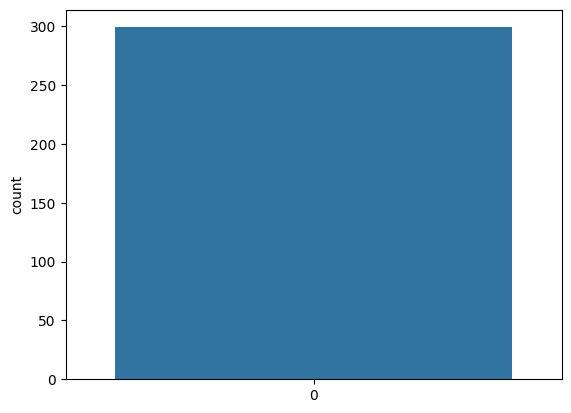

In [139]:
sns.countplot(df.DEATH_EVENT)

<Axes: xlabel='diabetes', ylabel='count'>

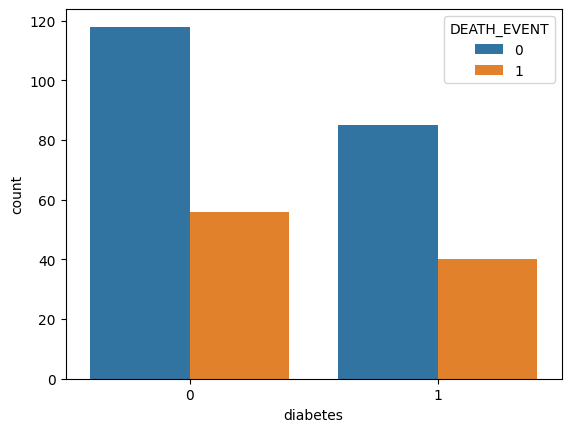

In [141]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=df)

<Axes: xlabel='high_blood_pressure', ylabel='count'>

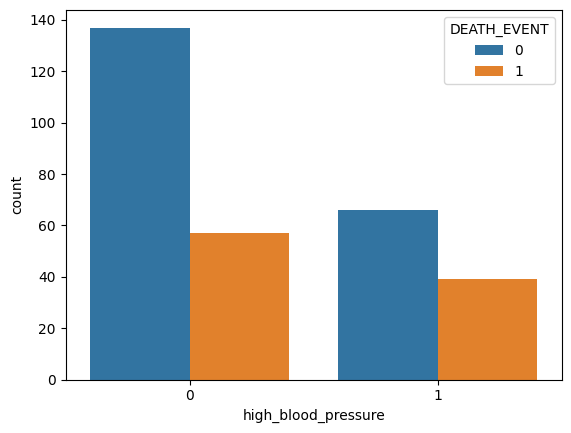

In [143]:
sns.countplot(x='high_blood_pressure',hue='DEATH_EVENT',data=df)

In [145]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: title={'center': 'Correlation for every column'}>

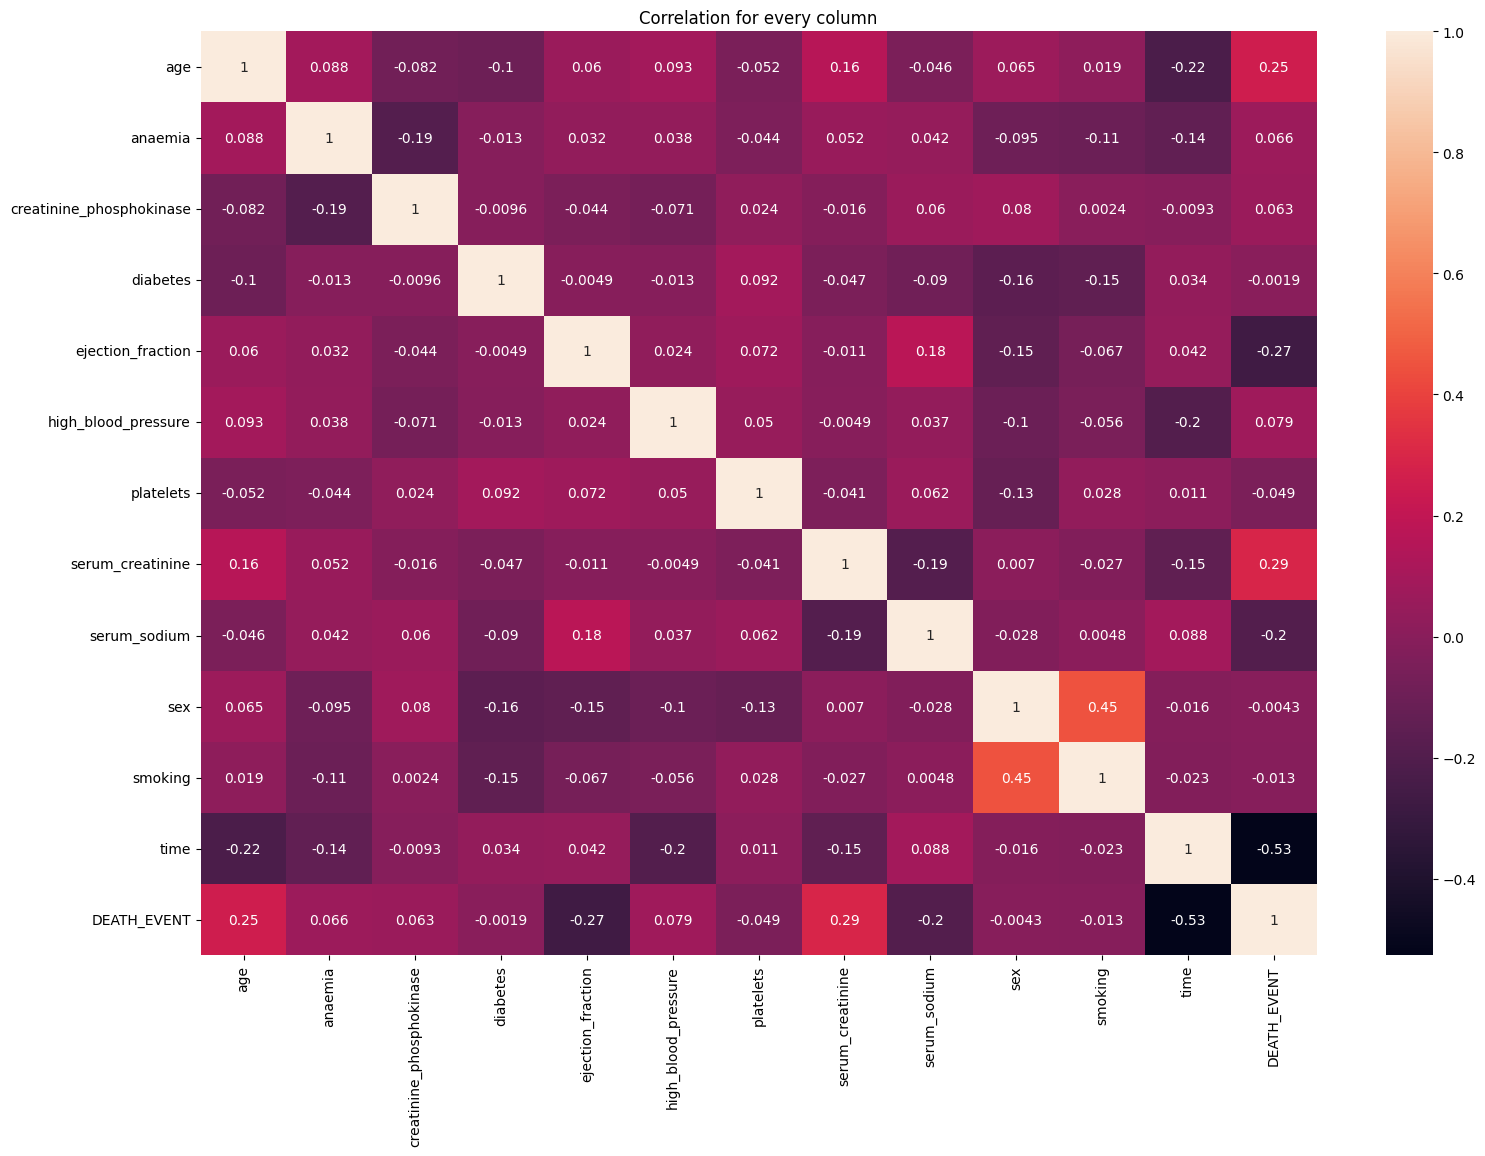

In [147]:
plt.figure(figsize=(18,12))
plt.title('Correlation for every column')
sns.heatmap(df.corr(),annot=True)

# Separate X,Y

In [149]:
x = df.drop('DEATH_EVENT',axis=1)

In [151]:
y=df[['DEATH_EVENT']]

In [153]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [155]:
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [157]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=42)

In [159]:
ytrain.head()

,DEATH_EVENT
224,0
68,1
222,0
37,1
16,1


In [161]:
xtrain.shape

(209, 12)

In [163]:
xtest.shape

(90, 12)

In [165]:
dt = DecisionTreeClassifier()

In [167]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

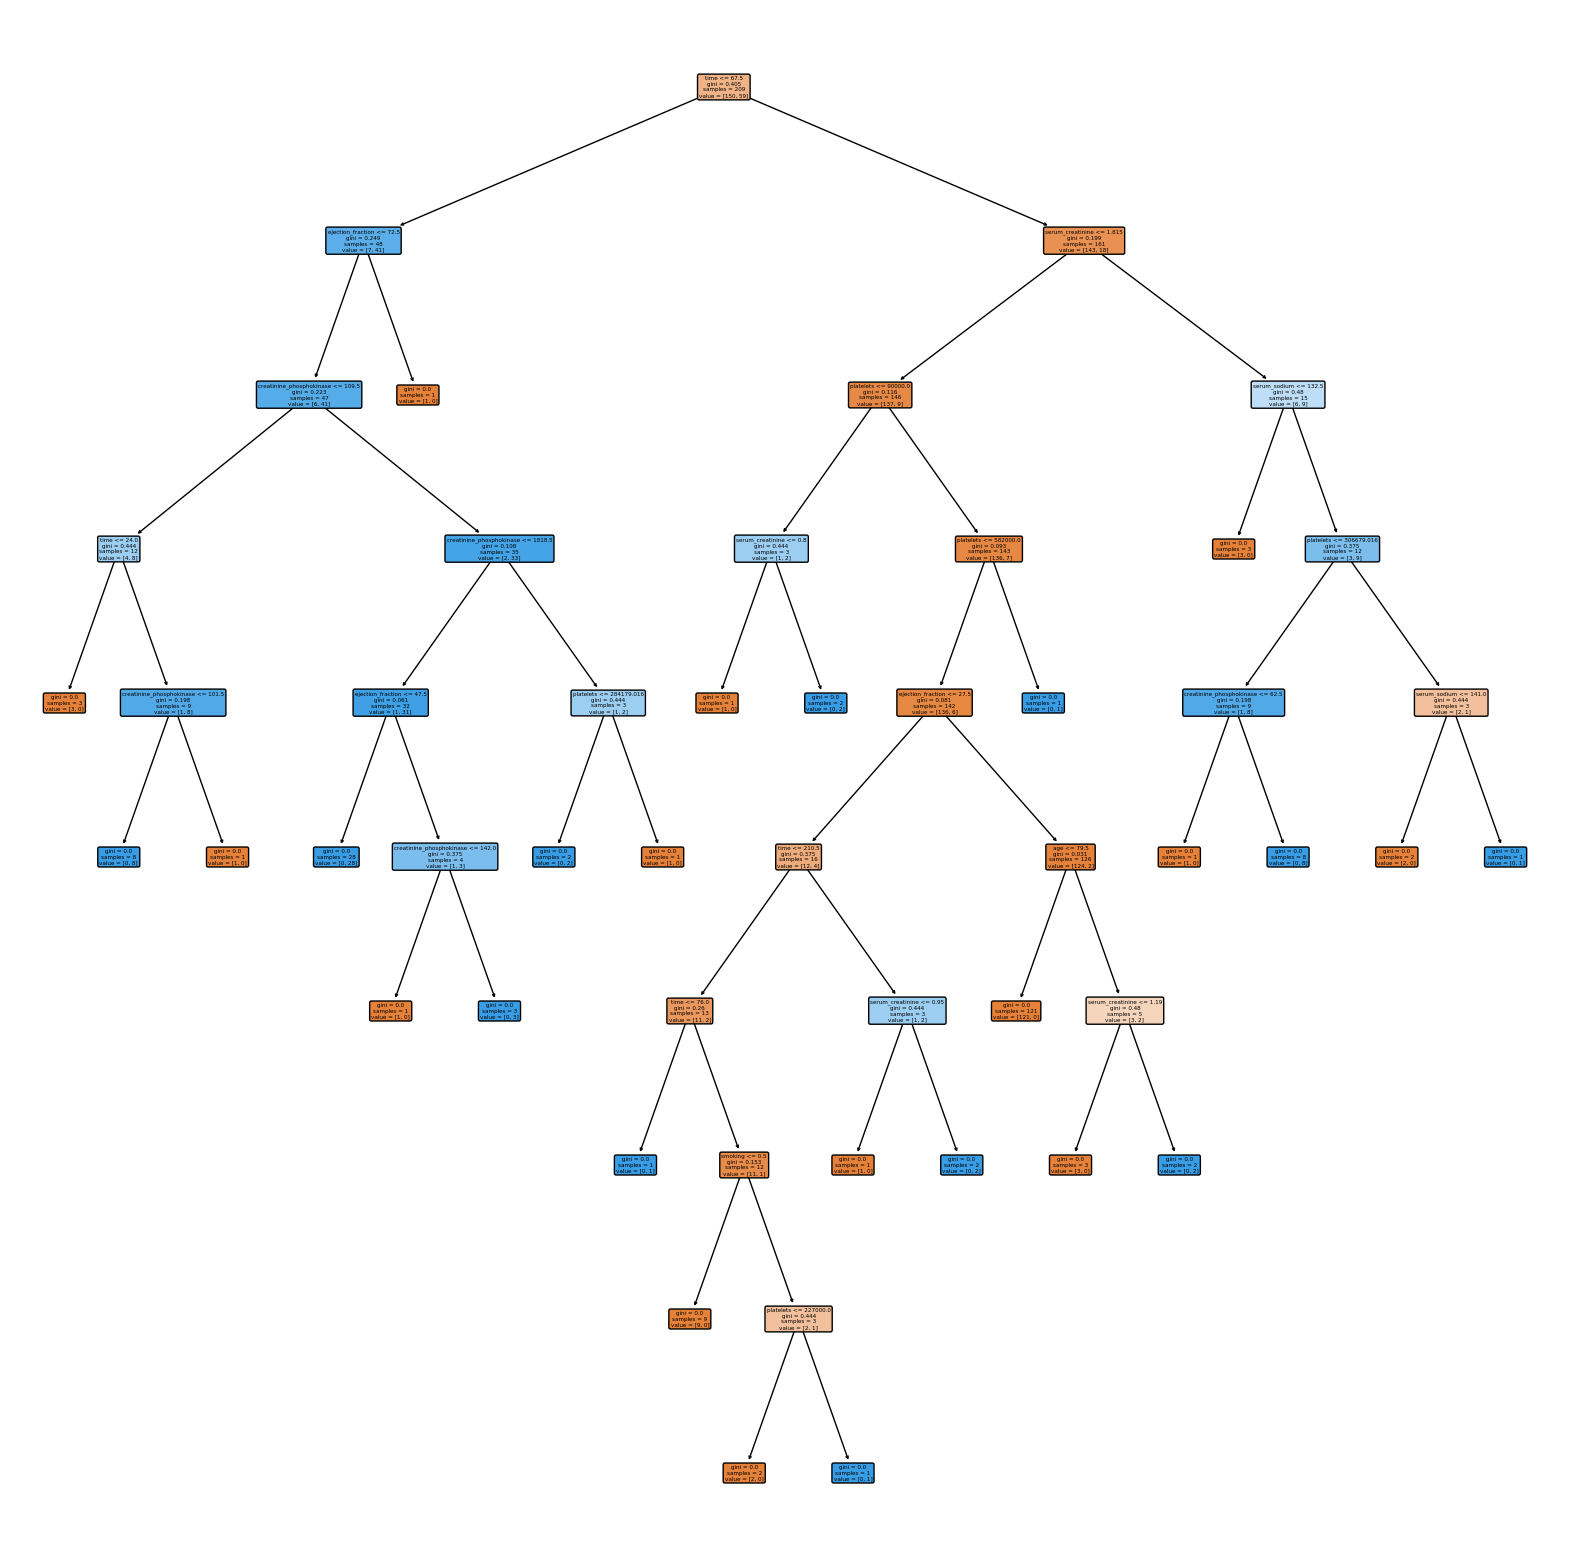

In [172]:
plt.figure(figsize=(20,20))
plot_tree(dt,filled=True,rounded=True,feature_names=x.columns)
plt.savefig('tree.png',dpi=1000)

In [173]:
pred = dt.predict(xtest)

In [174]:
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [175]:
np.array(ytest)

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

# Confusion Matrix

In [176]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.69      0.77      0.73        53\n           1       0.61      0.51      0.56        37\n\n    accuracy                           0.67        90\n   macro avg       0.65      0.64      0.65        90\nweighted avg       0.66      0.67      0.66        90\n'

In [177]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        53
           1       0.61      0.51      0.56        37

    accuracy                           0.67        90
   macro avg       0.65      0.64      0.65        90
weighted avg       0.66      0.67      0.66        90



In [178]:
cm = confusion_matrix(ytest,pred)
cm

array([[41, 12],
       [18, 19]], dtype=int64)

Text(0.5, 1.0, 'confusion matrix')

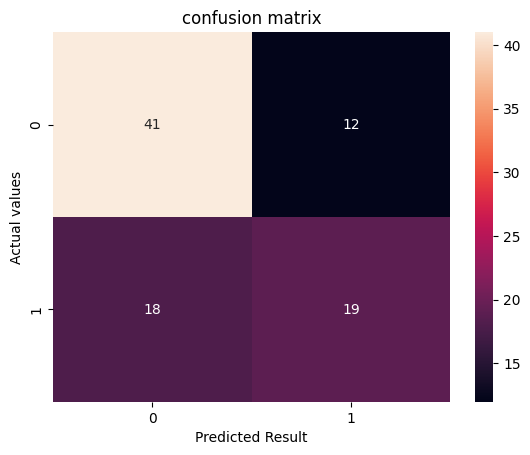

In [179]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual values')
plt.title('confusion matrix')

In [180]:
tp,fn,fp,tn = confusion_matrix(ytest,pred).reshape(-1)

In [181]:
tp

41

In [182]:
fn

12

In [183]:
fp

18

In [184]:
tn

19

In [185]:
accuracy = (tp+tn)/(tp+fp+fn+tn)

In [186]:
accuracy

0.6666666666666666

In [187]:
precision = tp/(tp+fp)

In [188]:
precision

0.6949152542372882

# ROC Curve

In [220]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(ytest, dt.predict_proba(xtest)[:, 1])
roc_auc = auc(fpr, tpr)

0.6435492095869455

In [190]:
accuracy_score(ytest,pred)

0.6666666666666666

In [191]:
dt.score(xtest,ytest)

0.6666666666666666

# Random Forest Classifier

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
rf=RandomForestClassifier()

In [194]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [195]:
rf.score(xtest,ytest)

0.7555555555555555

# Random Search CV

In [196]:
from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import randint

In [197]:
tree = np.random.randint(15,150,30)

In [198]:
tree

array([139, 128, 141,  32, 120,  43,  20,  49,  79, 143, 112, 104, 135,
        26, 121,  47,  95,  62,  71,  30, 108,  58,  74,  51,  69,  60,
       146,  26, 148,  64])

In [199]:
max_feature= ['sqrt','log2']
max_depth = np.random.randint(2,12,50)
criterian = ['gini', 'entropy']
min_samples_split = [2,3,4]

grid = {
    'n_estimators': tree,
    'criterion': criterian,
    'max_features': max_feature,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

In [200]:
print(grid)

{'n_estimators': array([139, 128, 141,  32, 120,  43,  20,  49,  79, 143, 112, 104, 135,
        26, 121,  47,  95,  62,  71,  30, 108,  58,  74,  51,  69,  60,
       146,  26, 148,  64]), 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 'max_depth': array([11,  5, 11, 10,  5,  7,  2, 11,  2,  7,  2, 11,  7,  8, 11,  6,  9,
        2,  9,  9, 10, 11,  6,  2,  8,  7, 11,  7,  2,  8,  7,  6,  2,  2,
        7,  3,  6,  2, 10, 11,  2,  8,  8,  6,  5,  2,  2, 11,  7, 11]), 'min_samples_split': [2, 3, 4]}


In [201]:
rcv = RandomizedSearchCV(rf, grid,n_iter=100,cv=3)

In [202]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([11,  5, 11, 10,  5,  7,  2, 11,  2,  7,  2, 11,  7,  8, 11,  6,  9,
        2,  9,  9, 10, 11,  6,  2,  8,  7, 11,  7,  2,  8,  7,  6,  2,  2,
        7,  3,  6,  2, 10, 11,  2,  8,  8,  6,  5,  2,  2, 11,  7, 11]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([139, 128, 141,  32, 120,  43,  20,  49,  79, 143, 112, 104, 135,
        26, 121,  47,  95,  62,  71,  30, 108,  58,  74,  51,  69,  60,
       146,  26, 148,  64])})

In [203]:
rcv.cv_results_

{'mean_fit_time': array([0.23089457, 0.11525551, 0.22543859, 0.41036264, 0.27147635,
        0.19414234, 0.35890675, 0.17163078, 0.53570159, 0.08000231,
        0.51156354, 0.12276459, 0.19433085, 0.49978646, 0.22001688,
        0.31297628, 0.2181286 , 0.22423458, 0.24534281, 0.25317518,
        0.43555919, 0.17090694, 0.41594974, 0.33927019, 0.40797718,
        0.3847696 , 0.14849313, 0.33005055, 0.20288022, 0.32915568,
        0.19537592, 0.20327934, 0.05971559, 0.31379239, 0.3241539 ,
        0.17249139, 0.30628705, 0.1831375 , 0.38676778, 0.33142972,
        0.14980372, 0.14283903, 0.21755338, 0.19839485, 0.43242407,
        0.09016148, 0.27975122, 0.16214156, 0.41354672, 0.34101033,
        0.33647203, 0.40271378, 0.21846604, 0.30333249, 0.42179592,
        0.14689708, 0.40012876, 0.1764125 , 0.28645277, 0.28033249,
        0.42080466, 0.49026338, 0.35726436, 0.42551565, 0.16244411,
        0.1995279 , 0.20707877, 0.14898237, 0.42868519, 0.20300492,
        0.14685615, 0.38494523,

In [204]:
tuning_result = pd.DataFrame(rcv.cv_results_)
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.230895,0.020026,0.024842,0.002277,60,2,log2,5,entropy,"{'n_estimators': 60, 'min_samples_split': 2, '...",0.814286,0.957143,0.855072,0.875500,0.060083,14
1,0.115256,0.003281,0.015765,0.001960,32,2,log2,7,entropy,"{'n_estimators': 32, 'min_samples_split': 2, '...",0.800000,0.957143,0.869565,0.875569,0.064294,9
2,0.225439,0.007540,0.023347,0.001265,69,3,sqrt,2,entropy,"{'n_estimators': 69, 'min_samples_split': 3, '...",0.757143,0.842857,0.826087,0.808696,0.037091,100
3,0.410363,0.005737,0.028972,0.000649,121,3,log2,2,entropy,"{'n_estimators': 121, 'min_samples_split': 3, ...",0.814286,0.885714,0.797101,0.832367,0.038369,94
4,0.271476,0.015630,0.023433,0.003948,79,2,log2,7,gini,"{'n_estimators': 79, 'min_samples_split': 2, '...",0.800000,0.957143,0.855072,0.870738,0.065103,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.147261,0.001749,0.015992,0.000003,51,2,log2,8,gini,"{'n_estimators': 51, 'min_samples_split': 2, '...",0.814286,0.914286,0.884058,0.870876,0.041875,23
96,0.147686,0.004855,0.016895,0.001494,49,2,sqrt,11,gini,"{'n_estimators': 49, 'min_samples_split': 2, '...",0.800000,0.914286,0.869565,0.861284,0.047023,49
97,0.128567,0.006821,0.016638,0.002319,43,4,sqrt,11,gini,"{'n_estimators': 43, 'min_samples_split': 4, '...",0.814286,0.928571,0.840580,0.861146,0.048871,60
98,0.089643,0.002465,0.012665,0.000472,32,2,log2,2,entropy,"{'n_estimators': 32, 'min_samples_split': 2, '...",0.814286,0.914286,0.797101,0.841891,0.051669,90


In [205]:
rcv.best_score_

0.8851621808143547

In [206]:
rcv.best_params_

{'n_estimators': 64,
 'min_samples_split': 3,
 'max_features': 'log2',
 'max_depth': 11,
 'criterion': 'entropy'}

In [207]:
rcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_split=3, n_estimators=64)

In [208]:
rcv2 = rcv.best_estimator_
rcv2

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_split=3, n_estimators=64)

In [209]:
rcv2.score(xtest,ytest)

0.7555555555555555

In [210]:
rcv2.base_estimator_

DecisionTreeClassifier()

In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

best_params = rcv.best_params_
best_estimator = RandomForestClassifier(**best_params)

best_estimator.fit(xtrain, ytrain)

y_pred = best_estimator.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
accuracy

0.7777777777777778